# Double Pendulum

A double pendulum simulation using Lagrangian mechanics.

In [1]:
import numpy as np
from scipy.integrate import odeint
import sympy as smp
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation

### Symbols

We will represent the time in seconds using the symbol t. The constants g, m1, m2, l1, l2 will represent the gravitational force, masses of the pendulums, and the length of the pendulums, respectively.

In [2]:
t = smp.symbols('t')

g, m1, m2, l1, l2 = smp.symbols("g m1:3 l1:3", positive = True)

the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

the1 = the1(t)
the2 = the2(t)

x1 = smp.sin(the1) * l1
y1 = -smp.cos(the1) * l1
x2 = x1 + smp.sin(the2) * l2
y2 = y1 - smp.cos(the2) * l2


In [3]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
x1_dd = smp.diff(smp.diff(x1, t), t)
y1_d = smp.diff(y2, t)
y1_dd = smp.diff(smp.diff(y1, t), t)
x2_d = smp.diff(x2, t)
x2_dd = smp.diff(smp.diff(x2, t), t)
y2_dd = smp.diff(smp.diff(y2, t), t)
y2_dd

l1*sin(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + l1*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + l2*sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + l2*cos(\theta_2(t))*Derivative(\theta_2(t), t)**2

#### Equations for The Second Derivative of Angles

In [4]:
eq1 = smp.Eq(smp.sin(the1) * (m1*y1_dd + m2*y2_dd + (m2 + m1)*g), -smp.cos(the1) * (m1 * x1_dd + m2 * x2_dd))
eq2 = smp.Eq(smp.sin(the2) * (m2 * (y2_dd + g)), -smp.cos(the2) * m2 * x2_dd)

In [5]:
eq1

Eq((g*(m1 + m2) + m1*(l1*sin(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + l1*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2) + m2*(l1*sin(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + l1*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + l2*sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + l2*cos(\theta_2(t))*Derivative(\theta_2(t), t)**2))*sin(\theta_1(t)), -(m1*(-l1*sin(\theta_1(t))*Derivative(\theta_1(t), t)**2 + l1*cos(\theta_1(t))*Derivative(\theta_1(t), (t, 2))) + m2*(-l1*sin(\theta_1(t))*Derivative(\theta_1(t), t)**2 + l1*cos(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) - l2*sin(\theta_2(t))*Derivative(\theta_2(t), t)**2 + l2*cos(\theta_2(t))*Derivative(\theta_2(t), (t, 2))))*cos(\theta_1(t)))

In [6]:
eq2

Eq(m2*(g + l1*sin(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) + l1*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + l2*sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) + l2*cos(\theta_2(t))*Derivative(\theta_2(t), t)**2)*sin(\theta_2(t)), -m2*(-l1*sin(\theta_1(t))*Derivative(\theta_1(t), t)**2 + l1*cos(\theta_1(t))*Derivative(\theta_1(t), (t, 2)) - l2*sin(\theta_2(t))*Derivative(\theta_2(t), t)**2 + l2*cos(\theta_2(t))*Derivative(\theta_2(t), (t, 2)))*cos(\theta_2(t)))

In [7]:
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)
solutions = smp.solve([eq1, eq2], the1_dd, the2_dd)
solutions[the2_dd].simplify()

(g*m1*sin(2*\theta_1(t) - \theta_2(t)) - g*m1*sin(\theta_2(t)) + g*m2*sin(2*\theta_1(t) - \theta_2(t)) - g*m2*sin(\theta_2(t)) + 2*l1*m1*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + 2*l1*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + l2*m2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_2(t), t)**2)/(l2*(2*m1 - m2*cos(2*\theta_1(t) - 2*\theta_2(t)) + m2))

In [8]:
dw1dt_f = smp.lambdify((t,g,m1,m2,l1,l2,the1,the2,the1_d,the2_d), solutions[the1_dd])
dw2dt_f = smp.lambdify((t,g,m1,m2,l1,l2,the1,the2,the1_d,the2_d), solutions[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

In [9]:
def dfdt(f, t, g, m1, m2, l1, l2):
    the_1, w1, the_2, w2 = f
    return [
        dthe1dt_f(w1),
        dw1dt_f(t, g, m1, m2, l1, l2, the_1, the_2, w1, w2),
        dthe2dt_f(w2),
        dw2dt_f(t, g, m1, m2, l1, l2, the_1, the_2, w1, w2),
    ]

In [10]:
t =  np.linspace(0, 100, 10001)
g = 9.81
m1 = 2
m2 = 1
l1 = 2
l2 = 1
ans = odeint(dfdt, y0=[3, 2, 1, 1], t=t, args=(g, m1, m2, l1, l2))
ans1 = odeint(dfdt, y0=[1.50001, 2, 1, 1], t=t, args=(g, m1, m2, l1, l2))
ans

array([[  3.        ,   2.        ,   1.        ,   1.        ],
       [  3.01995319,   1.99079411,   1.00990916,   0.98168194],
       [  3.03981903,   1.98253191,   1.01963084,   0.9625248 ],
       ...,
       [102.35095175,   2.42045499, 293.97488348,  13.80107782],
       [102.37486314,   2.3533081 , 294.11279339,  13.76546535],
       [102.39785177,   2.23645813, 294.24989219,  13.64002629]])

In [11]:
the_1 = ans.T[0]
the_2 = ans.T[2]
the_3 = ans1.T[0]
the_4 = ans1.T[2]

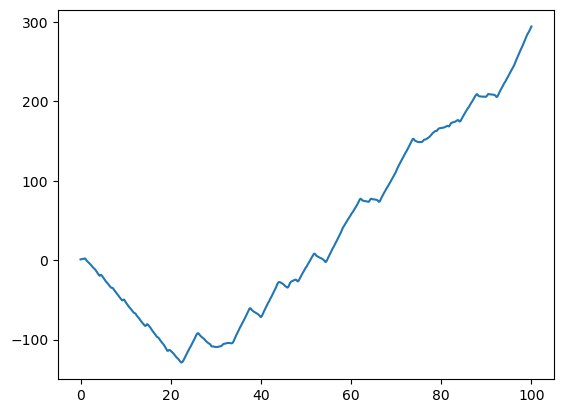

In [12]:
plt.plot(t, the_2)

In [13]:
def get_x1y1x2y2(t, the1, the2, l1, l2):
    return (l1*np.sin(the1),
            -l1*np.cos(the1),
            l1*np.sin(the1) + l2*np.sin(the2),
            -l1*np.cos(the1) - l2*np.cos(the2))
x1, y1, x2, y2 = get_x1y1x2y2(t, the_1, the_2, l1, l2)
x3, y3, x4, y4 = get_x1y1x2y2(t, the_3, the_4, l1, l2)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_axis_off()
ax.set_aspect('equal', adjustable='box')
ax.set_ylim(-l1-l2 - 0.3, l1+l2 + 0.3)
ax.set_xlim(-l1-l2 - 0.3, l1+l2 + 0.3)
plt.grid(False)

plot_paths1, = ax.plot([], [])
plot_paths2, = ax.plot([], [])

def update_data(frame):

    pend1.set_data([0, x1[frame]], [0, y1[frame]])
    mass1.set_data([x1[frame]], [y1[frame]])

    pend2.set_data([x1[frame], x2[frame]], [y1[frame], y2[frame]])
    mass2.set_data([x2[frame]], [y2[frame]])

    pend3.set_data([0, x3[frame]], [0, y3[frame]])
    mass3.set_data([x3[frame]], [y3[frame]])

    pend4.set_data([x3[frame], x4[frame]], [y3[frame], y4[frame]])
    mass4.set_data([x4[frame]], [y4[frame]])

    plot_paths1.set_data(x1, y1)
    plot_paths2.set_data(x3, y3)
    
    return pend1, mass1, pend2, mass2, pend3, mass3, pend4, mass4, plot_paths1, plot_paths2


pend1, = ax.plot([0, x1[0]], [0, y1[0]], lw=1)
mass1, = ax.plot([x1[0]], [y1[0]], 'o', markersize=2*m1, color='green')

pend2, = ax.plot([x1[0], x2[0]], [y1[0], y2[0]], lw=1)
mass2, = ax.plot([x2[0]], [y2[0]], 'o', markersize=2*m2, color='green')

pend3, = ax.plot([0, x3[0]], [0, y3[0]], lw=1)
mass3, = ax.plot([x3[0]], [y3[0]], 'o', markersize=2*m1, color='red')

pend4, = ax.plot([x3[0], x4[0]], [y3[0], y4[0]], lw=1)
mass4, = ax.plot([x4[0]], [y4[0]], 'o', markersize=2*m2, color='red')

ani = animation.FuncAnimation(fig, update_data, frames=len(t), interval=25, blit=True)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.
